In [5]:
import cv2
import requests
import matplotlib.pyplot as plt
import torch
from skimage import io
from PIL import Image
from SimpleHRNet import SimpleHRNet


In [4]:
import sys
sys.path.append("C:\\Users\\User\\Documents\\VUZ\\psuObjectDecection\\KT3\\simple-HRNet")

In [8]:
weight_path = "C:\\Users\\User\\Documents\\VUZ\\psuObjectDecection\\KT3\\pose_hrnet_w32_256x192.pth"

device = torch.device('cpu')


model = SimpleHRNet(32, 17, weight_path,  yolo_version='v5', yolo_model_def='yolov5n', multiperson=False, device=device)

url = 'https://qph.cf2.quoracdn.net/main-qimg-7766c2eaa3854674797d1ded61a50c01-lq'
image_path = 'C:\\Users\\User\\Documents\\VUZ\\psuObjectDecection\\KT3\\image.jpg'
image = io.imread(image_path)

joints = model.predict(image)


device: 'cpu'


Один человек на изображении

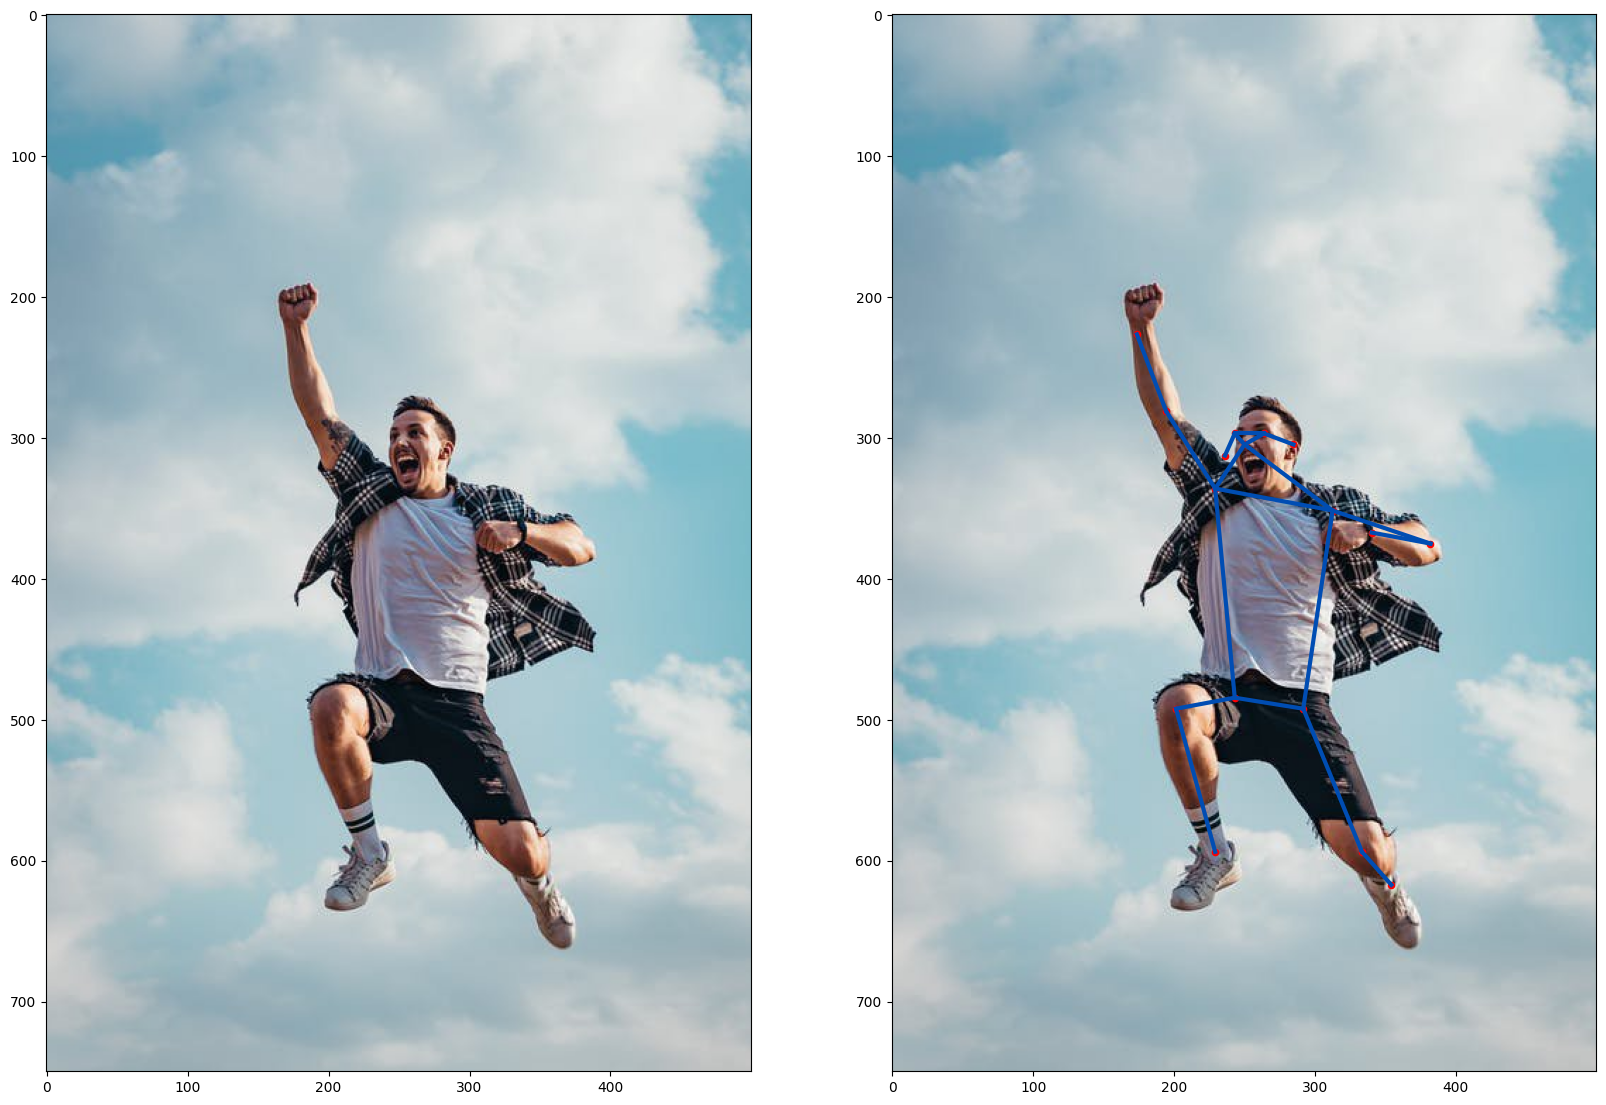

In [13]:
%matplotlib inline
from misc.visualization import joints_dict


def plot_joints(ax, output):
    bones = joints_dict()['coco']['skeleton']

    for bone in bones :
        xS = [output[:, bone[0], 1], output[:, bone[1], 1]]
        yS = [output[:, bone[0], 0], output[:, bone[1], 0]]
        ax.plot(xS, yS, linewidth=3, c=(0, 0.3, 0.7))
    ax.scatter(joints[:, :, 1], joints[:, :, 0], s=20, c='r')

fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(121)
ax.imshow(image)
ax = fig.add_subplot(122)
ax.imshow(image)
plot_joints(ax, joints)
plt.show()


Группа людей на изображении

In [16]:
image_path = 'C:\\Users\\User\\Documents\\VUZ\\psuObjectDecection\\KT3\\image_group.jpg'
image = io.imread(image_path)

In [17]:
joints = model.predict(image)

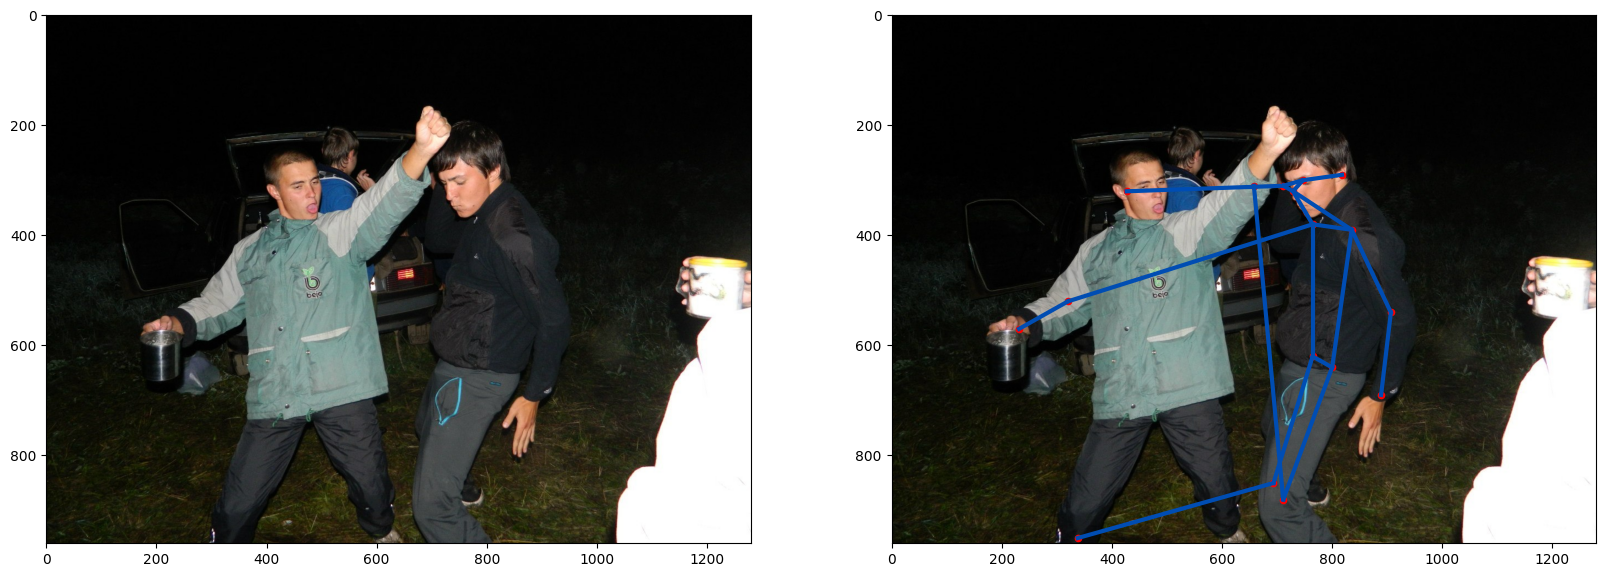

In [19]:
%matplotlib inline
from misc.visualization import joints_dict


def plot_joints(ax, output):
    bones = joints_dict()['coco']['skeleton']

    for bone in bones :
        xS = [output[:, bone[0], 1], output[:, bone[1], 1]]
        yS = [output[:, bone[0], 0], output[:, bone[1], 0]]
        ax.plot(xS, yS, linewidth=3, c=(0, 0.3, 0.7))
    ax.scatter(joints[:, :, 1], joints[:, :, 0], s=20, c='r')

fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(121)
ax.imshow(image)
ax = fig.add_subplot(122)
ax.imshow(image)
plot_joints(ax, joints)
plt.show()


Наблюдаются сложности при наложении объектов

Пробуем другое изображение

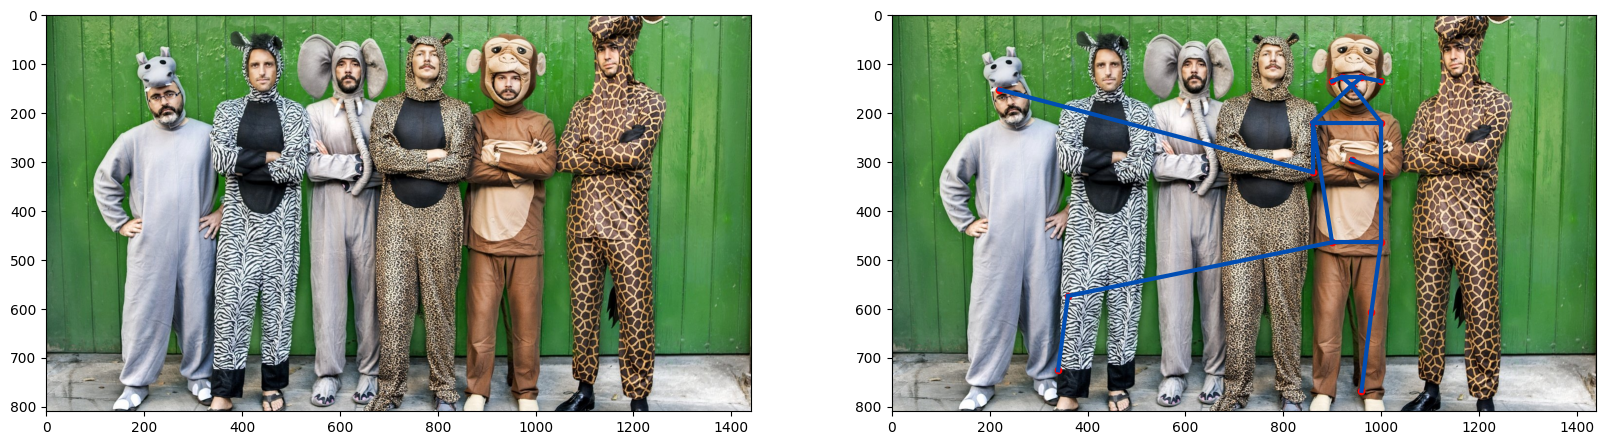

In [22]:
image_path = 'C:\\Users\\User\\Documents\\VUZ\\psuObjectDecection\\KT3\\image_group2.jpg'
image = io.imread(image_path)
joints = model.predict(image)


%matplotlib inline
from misc.visualization import joints_dict


def plot_joints(ax, output):
    bones = joints_dict()['coco']['skeleton']

    for bone in bones :
        xS = [output[:, bone[0], 1], output[:, bone[1], 1]]
        yS = [output[:, bone[0], 0], output[:, bone[1], 0]]
        ax.plot(xS, yS, linewidth=3, c=(0, 0.3, 0.7))
    ax.scatter(joints[:, :, 1], joints[:, :, 0], s=20, c='r')

fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(121)
ax.imshow(image)
ax = fig.add_subplot(122)
ax.imshow(image)
plot_joints(ax, joints)
plt.show()


Делаа...